### Today:
* Support Vector Machine
    * Linear SVM
        * Hard-margin
        * Soft-margin
    * Nonlinear SVM

### Resources:
* Support Vector Machine: https://www.svm-tutorial.com/
* Support Vector Machine: http://cs229.stanford.edu/notes/cs229-notes3.pdf
* Support Vector Machine: http://web.mit.edu/zoya/www/SVM.pdf
* Kernel Methods: https://www.cs.utah.edu/~piyush/teaching/15-9-slides.pdf

# Soft-margin SVM

In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
tf.reset_default_graph()

In [2]:
# Load dataset as numpy array
data = np.loadtxt('../../data/03_LogisticRegression/lr_data.csv', delimiter=',')

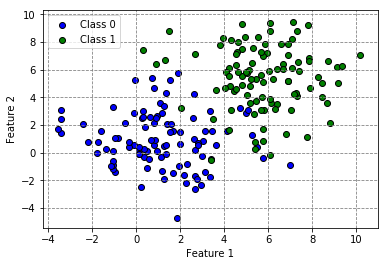

In [3]:
# Find index of samples with class 0
idx = data[:, 2] == 0.0

# Plot dataset
fig, ax = plt.subplots()
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.scatter(data[idx][:, 0], data[idx][:,1], c='b', edgecolors='k', label='Class 0')
ax.scatter(data[~idx][:,0], data[~idx][:,1], c='g', edgecolors='k', label='Class 1')
ax.grid(True, color='gray', linestyle='dashed')
ax.legend()

$$ D = \Big\{ \big(x^{(i)}, y^{(i)} \big) \; \mid \; x^{(i)} \in \mathbb{R}^{n}, y^{(i)} \in \{-1, 1\} \Big\}_{i=1}^{m} $$

In [4]:
# Split dataset on features and labels
x_data = data[:, :2]
y_data = data[:, 2].reshape(len(data), 1)

# Convert labels to -1, 1
y_data[y_data==0] = -1

In [5]:
# Data parameters
train_size = len(data)
n_features = 2
n_labels = 1

# Training parameters
C = 0.1
n_epoch = 100
batch_size = 100
learning_rate = 0.01

## Model

In [6]:
# Graph input
X = tf.placeholder(tf.float32, [None, n_features], "X")
y = tf.placeholder(tf.float32, [None, n_labels], "y")

# Model parameters
W = tf.Variable(tf.random_normal([n_features, n_labels]))
b = tf.Variable(tf.random_normal([n_labels]))

In [7]:
hypothesis = tf.add(tf.matmul(X, W), b)

## Cost

$$ \frac{1}{2} \| w \|_{2}^{2} + C\sum_{i=1}^{m} \max \big(0, 1 - y^{(i)} (w^{T}x^{(i)} + b) \big)$$

In [8]:
regularization_loss = 0.5 * tf.reduce_sum(tf.square(W)) 

hinge_loss = tf.reduce_sum(tf.maximum(tf.zeros([batch_size, 1]),  1 - y * hypothesis))

svm_loss = regularization_loss + C * hinge_loss

## Optimization

In [9]:
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(svm_loss)

## Evaluation

In [10]:
predicted_class = tf.sign(hypothesis)
correct_prediction = tf.equal(y, predicted_class)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Train

In [11]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    for step in range(n_epoch * train_size // batch_size):
        
        offset = (step * batch_size) % train_size
        batch_data = x_data[offset:(offset + batch_size), :]
        batch_labels = y_data[offset:(offset + batch_size)]
        
        train_step.run(feed_dict={X: batch_data, y: batch_labels})
        
        print('Loss: ', svm_loss.eval(feed_dict={X: batch_data, y: batch_labels}))
    
    print("Accuracy on train:", accuracy.eval(feed_dict={X: x_data, y: y_data}))
    W_computed, b_computed = W.eval(), b.eval()

Loss:  21.90517
Loss:  15.981653
Loss:  16.498453
Loss:  13.786549
Loss:  14.94245
Loss:  12.51045
Loss:  13.650144
Loss:  11.342251
Loss:  12.448495
Loss:  10.242634
Loss:  11.299291
Loss:  9.227168
Loss:  10.213726
Loss:  8.271347
Loss:  9.171379
Loss:  7.403327
Loss:  8.190579
Loss:  6.625538
Loss:  7.2825394
Loss:  5.9139214
Loss:  6.5412745
Loss:  5.2841806
Loss:  5.7934475
Loss:  4.770051
Loss:  5.302811
Loss:  4.3462334
Loss:  4.7439346
Loss:  4.0868583
Loss:  4.3614845
Loss:  3.8576977
Loss:  4.144532
Loss:  3.7549038
Loss:  3.9718583
Loss:  3.6151788
Loss:  3.7658875
Loss:  3.4239092
Loss:  3.6316307
Loss:  3.2983468
Loss:  3.4393961
Loss:  3.178865
Loss:  3.2705843
Loss:  3.067673
Loss:  3.1201599
Loss:  2.9158034
Loss:  3.1148329
Loss:  2.9133294
Loss:  2.9063675
Loss:  2.7795553
Loss:  2.8566332
Loss:  2.7343886
Loss:  2.8390925
Loss:  2.7462165
Loss:  2.7210202
Loss:  2.6528175
Loss:  2.704081
Loss:  2.6431766
Loss:  2.6462107
Loss:  2.5976412
Loss:  2.624545
Loss:  2.5900

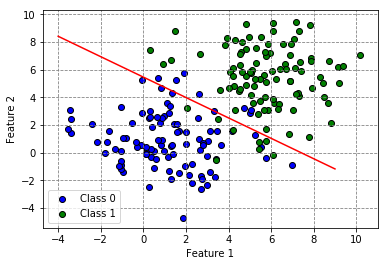

In [12]:
parameters = [b_computed[0], W_computed[1][0], W_computed[0][0]]
parameters
x = np.arange(-4, 10)
y = (-parameters[0] - parameters[1] * x) / parameters[2]
ax.plot(x, y, '-', color='r', marker=' ')
fig